In [3]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=2.0, style='whitegrid', color_codes=True)

# Sentiment Libraries
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax
import torch

import ast
from datetime import datetime
from tqdm import tqdm
import time

pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows',100)

C:\Users\Menaka\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Menaka\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Menaka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_csv('Final_tweet_LDA.csv')
data.head(5)

,content,Text_new,Datecreated,Month,VADER_Scores,VADER_Polarity,VADER_Sentiment,Topic_Name,Sentiment Scores,Sentiment Labels,Clean_tweet,Tweet_tokenized,Tweet_lemmatized,Tokens
0,Code-generating #AI can introduce #security #vulnerabilities \nhttps://t.co/tBoOQkK4LD\n\n#cryptocurrencies #MachineLearning #AI #Python #DeepLearning #100DaysOfCode #fintech #nocode #bitcoin #cyb...,code generate ai introduce security vulnerability machinelearning ai-python-deeplearning daysofcode-fintech-nocode-bitcoin cybersecurity-cybersecurite-insurtech chatgpt,29-12-2022,12,"{'neg': 0.143, 'neu': 0.677, 'pos': 0.18, 'compound': 0.128}",0.1280,Neutral,7 Fintech and Emerging Technologies,[0.35326478 0.6087465 0.03798864],Neutral,code generating ai introduce security vulnerabilities machinelearning ai python deeplearning 100daysofcode fintech nocode bitcoin cybersecurity cybersecurite insurtech chatgpt,"['code', 'generating', 'ai', 'introduce', 'security', 'vulnerabilities', 'machinelearning', 'ai', 'python', 'deeplearning', '100daysofcode', 'fintech', 'nocode', 'bitcoin', 'cybersecurity', 'cyber...","['code', 'generate', 'ai', 'introduce', 'security', 'vulnerability', 'machinelearning', 'ai', 'python', 'deeplearning', '100daysofcode', 'fintech', 'nocode', 'bitcoin', 'cybersecurity', 'cybersecu...",code generate ai introduce security vulnerability machinelearning ai python deeplearning 100daysofcode fintech nocode bitcoin cybersecurity cybersecurite insurtech chatgpt
1,Advanced prompt engineering also needs some kind of #security #ChatGPT @SGgrc \nhttps://t.co/euF66Y2KXt,advanced prompt engineering also need kind security chatgpt,29-12-2022,12,"{'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.7783}",0.7783,Positive,2 AI Technologies and Security,[0.05496904 0.83089197 0.11413907],Neutral,advanced prompt engineering also needs kind security chatgpt,"['advanced', 'prompt', 'engineering', 'also', 'needs', 'kind', 'security', 'chatgpt']","['advanced', 'prompt', 'engineering', 'also', 'need', 'kind', 'security', 'chatgpt']",advanced prompt engineering also need kind security chatgpt
2,#ChatGPT is a big #Deal and here’s why…\n\n-- Digital Security | The ...: https://t.co/EYOMaiWkn5.\n\n#2023 #Ai #AiNews #Applications #ArtificialIntelligence #Bugs #Chatbot #Chatbots #Code #Coding...,chatgpt big deal digital security ai ainews application bug chatbot chatbots code cod composition computer customerservice cybersecurity da,29-12-2022,12,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.34}",0.3400,Positive,6 Data Security and Risk Management,[0.11569155 0.7844561 0.09985234],Neutral,chatgpt big deal ’ why… digital security ai ainews applications artificialintelligence bugs chatbot chatbots code coding composition computers customerservice cybersecurity cybersecuritynews da,"['chatgpt', 'big', 'deal', 'why', 'digital', 'security', 'ai', 'ainews', 'applications', 'artificialintelligence', 'bugs', 'chatbot', 'chatbots', 'code', 'coding', 'composition', 'computers', 'cus...","['chatgpt', 'big', 'deal', 'why', 'digital', 'security', 'ai', 'ainews', 'application', 'artificialintelligence', 'bug', 'chatbot', 'chatbots', 'code', 'cod', 'composition', 'computer', 'customers...",chatgpt big deal why digital security ai ainews application artificialintelligence bug chatbot chatbots code cod composition computer customerservice cybersecurity cybersecuritynews da
3,#ChatGPT is a big #Deal and here’s why…\n\n-- Digital Security | The ...: https://t.co/1mLxQxpvAS.\n\n#2023 #Ai #AiNews #Applications #ArtificialIntelligence #Bugs #Chatbot #Chatbots #Code #Coding...,chatgpt big deal digital security ai ainews application bug chatbot chatbots code cod composition computer customerservice cybersecurity da,29-12-2022,12,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.34}",0.3400,Positive,6 Data Security and Risk Management,[0.11569155 0.7844561 0.09985234],Neutral,chatgpt big deal ’ why… digital security ai ainews applications artificialintelligence bugs chat

In [14]:
len(data)

38537

In [18]:

df_sample = data[['content', 'Text_new', 'Datecreated', 'Month']].copy()

df_sample.head(5)

	

,content,Text_new,Datecreated,Month
0,Code-generating #AI can introduce #security #vulnerabilities \nhttps://t.co/tBoOQkK4LD\n\n#cryptocurrencies #MachineLearning #AI #Python #DeepLearning #100DaysOfCode #fintech #nocode #bitcoin #cyb...,code generate ai introduce security vulnerability machinelearning ai-python-deeplearning daysofcode-fintech-nocode-bitcoin cybersecurity-cybersecurite-insurtech chatgpt,2022-12-29,12
1,Advanced prompt engineering also needs some kind of #security #ChatGPT @SGgrc \nhttps://t.co/euF66Y2KXt,advanced prompt engineering also need kind security chatgpt,2022-12-29,12
2,#ChatGPT is a big #Deal and here’s why…\n\n-- Digital Security | The ...: https://t.co/EYOMaiWkn5.\n\n#2023 #Ai #AiNews #Applications #ArtificialIntelligence #Bugs #Chatbot #Chatbots #Code #Coding...,chatgpt big deal digital security ai ainews application bug chatbot chatbots code cod composition computer customerservice cybersecurity da,2022-12-29,12
3,#ChatGPT is a big #Deal and here’s why…\n\n-- Digital Security | The ...: https://t.co/1mLxQxpvAS.\n\n#2023 #Ai #AiNews #Applications #ArtificialIntelligence #Bugs #Chatbot #Chatbots #Code #Coding...,chatgpt big deal digital security ai ainews application bug chatbot chatbots code cod composition computer customerservice cybersecurity da,2022-12-29,12
4,I’ve been down the chat GPT rabbit hole.. and I’m fucking scared I’m not making it out of college with any job security,chat-gpt rabbit hole fuck scar make college job security,2022-12-28,12


In [19]:
%%time

vader_model = SentimentIntensityAnalyzer()

df_sample['VADER_Scores'] = df_sample['Text_new'].apply(lambda x: vader_model.polarity_scores(x))

CPU times: total: 6.97 s
Wall time: 13.2 s


In [22]:
df_sample['VADER_Polarity'] = df_sample['VADER_Scores'].apply(lambda x: x['compound'])


'''
-1 to -0.25 => negative; 
-0.25 and 0.25 => neutral; 
0.25 to 1 => positive;
'''
df_sample['VADER_Sentiment'] = pd.cut(df_sample['VADER_Polarity'],
                                bins = [-1, -0.25, 0.25, 1],
                                labels=['Negative', 'Neutral', 'Positive'])

In [25]:
df_sample.to_csv('VADER_Sentiment_result.csv', index=False)

Text(0.5, 1.0, 'Sentiment of Tweets about \nChatGPT Security by VADER')

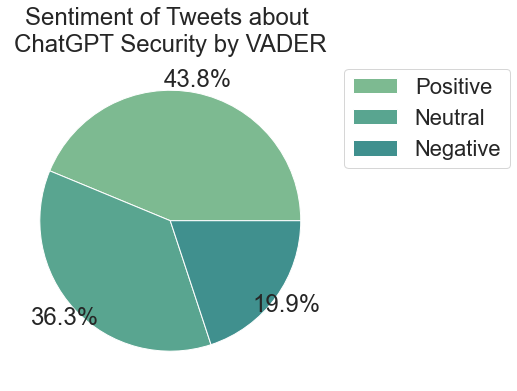

In [27]:
sns.set_palette('crest')
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.subplot(1,1,1)
pie_1 = df_sample['VADER_Sentiment'].value_counts()
plt.pie(pie_1, autopct="%.1f%%", pctdistance=1.1)
plt.legend(labels = pie_1.index, 
          bbox_to_anchor=[1,1])
plt.title('Sentiment of Tweets about \nChatGPT Security by VADER')

In [2]:
#sample accuracy test
import pandas as pd
from sklearn.metrics import accuracy_score


df = pd.read_csv('VADER_Sentiment_result.csv')
rd=pd.read_csv('VADER_Sentiment_result.csv')



actual_labels = df['VADER_Sentiment'].tolist()
vader_labels = rd['VADER_Sentiment'].tolist()


accuracy = accuracy_score(actual_labels, vader_labels)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [3]:
# accuracy test
import pandas as pd
from sklearn.metrics import accuracy_score


df = pd.read_csv('VADER_Sentiment_result.csv')
rd=pd.read_csv('Final_semtiment_document(2).csv')



actual_labels = df['VADER_Sentiment'].tolist()
vader_labels = rd['Sentiment Labels'].tolist()


accuracy = accuracy_score(actual_labels, vader_labels)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.45


In [4]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import sys

In [6]:
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from pprint import pprint


In [8]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Menaka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [10]:
df['Final_Tokens']=df['Text_new'].apply(lambda x: [word for word in simple_preprocess(x,deacc=True,min_len=3,max_len=50)if word
                                                  not in stopwords])

In [12]:
df.head()

,content,Text_new,Datecreated,Month,VADER_Scores,VADER_Polarity,VADER_Sentiment,Final_Tokens
0,Code-generating #AI can introduce #security #v...,code generate ai introduce security vulnerabil...,2022-12-29,12,"{'neg': 0.143, 'neu': 0.677, 'pos': 0.18, 'com...",0.1280,Neutral,"[code, generate, introduce, security, vulnerab..."
1,Advanced prompt engineering also needs some ki...,advanced prompt engineering also need kind sec...,2022-12-29,12,"{'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'comp...",0.7783,Positive,"[advanced, prompt, engineering, also, need, ki..."
2,#ChatGPT is a big #Deal and here’s why…\n\n-- ...,chatgpt big deal digital security ai ainews ap...,2022-12-29,12,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.3400,Positive,"[chatgpt, big, deal, digital, security, ainews..."
3,#ChatGPT is a big #Deal and here’s why…\n\n-- ...,chatgpt big deal digital security ai ainews ap...,2022-12-29,12,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.3400,Positive,"[chatgpt, big, deal, digital, security, ainews..."
4,I’ve been down the chat GPT rabbit hole.. and ...,chat-gpt rabbit hole fuck scar make college jo...,2022-12-28,12,"{'neg': 0.271, 'neu': 0.543, 'pos': 0.186, 'co...",-0.2732,Negative,"[chat, gpt, rabbit, hole, fuck, scar, make, co..."


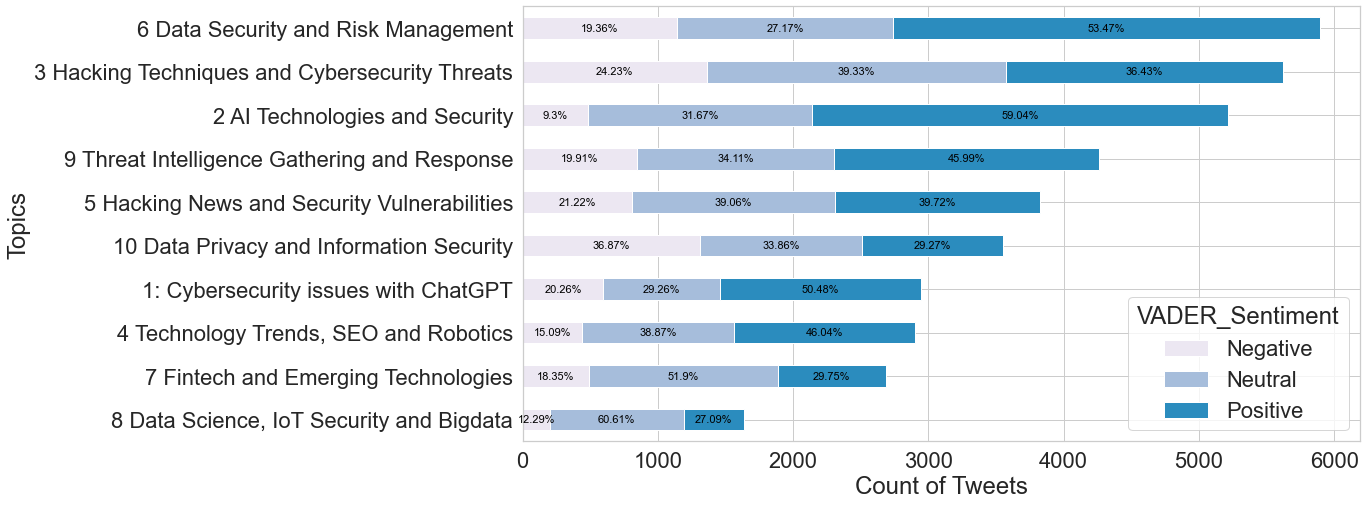

In [6]:
topic_sen = df.groupby('Topic_Name')['VADER_Sentiment'].value_counts().unstack().reset_index()
#sort by the popularity of the topics (total count)
topic_sen['Total']=topic_sen['Negative']+topic_sen['Neutral']+topic_sen['Positive']
topic_sen = topic_sen.sort_values('Total')
topic_sen=topic_sen.drop(columns='Total')
topic_sen = topic_sen.set_index('Topic_Name')

ax=topic_sen.plot(kind='barh',stacked='True', color=['#ece7f2', '#a6bddb', '#2b8cbe'], figsize=(15,8))
#get the percentage of each sentiment in specific topic
percentages = topic_sen.div(topic_sen.sum(axis=1), axis=0)
percentages = percentages.reset_index().melt('Topic_Name', var_name='Sentiment', value_name='Percentage')
#label the percentage of each sentiment
for i, patch in enumerate(ax.patches):
    ax.text(patch.get_x()+patch.get_width()/2, 
            patch.get_y()+0.25, 
            f'{round(percentages.loc[i,"Percentage"]*100,2)}%', 
            ha='center', va='center', 
            color='black', fontsize=11)
ax.set_xlabel('Count of Tweets')
ax.set_ylabel('Topics')
plt.show()